<a href="https://colab.research.google.com/github/PrathamMalhotra21/Yes_Bank_Closing_Price_Prediction/blob/main/Pratham_YesBank_Stock_price_predictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - YES BANK STOCK CLOSING PRICE PREDICTION


Project Type - Regression

Contribution - Pratham

#  Git Hub Link - https://github.com/PrathamMalhotra21/Yes_Bank_Closing_Price_Prediction

# Problem Statment

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

# Let's Begin!

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np 
from numpy import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV



from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
path = '/content/drive/MyDrive/Colab Notebooks/Pratham-YesBank_stockPrice_prediction/data_YesBank_StockPrices.csv'
dataset = pd.read_csv(path)

### Dataset Information

In [ ]:
# Datset First Look
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# Rows and columns
dataset.shape

(185, 5)

In [ ]:
# Dataset Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
# Dataset Describe
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Dataset Cleaning

In [ ]:
# Converting date type Format
from datetime import datetime
dataset['Date'] = dataset['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))

* The Given Date in data is of format MMM-YY is converted to proper date of YYYY-MM-DD.
* Date column has dtype as object we've to convert it into datetime format

In [ ]:
# Checking Duplicate Values
len(dataset[dataset.duplicated()])

0

In [ ]:
# Null Values/Missing Value
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

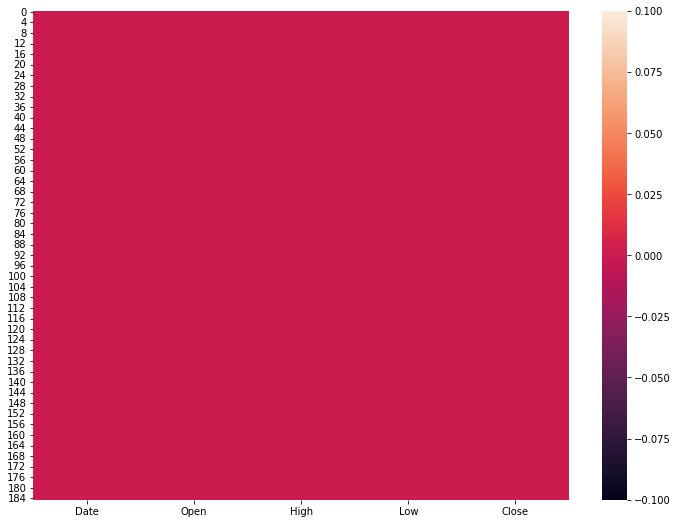

In [ ]:
# Visualizing Missing value
plt.rcParams['figure.figsize'] = (12,9)
sns.heatmap(dataset.isnull() , cbar = True)

**Conclusion**
* In the dataset of Yes Bank we have total 185 columns , 5 rows.
* No duplicate and Null values are present in the dataset.

### Variable description

Date - It denotes the month & year with respect to the price of the stock.

Open - opening price.

High - higest price in the day.

Low -  Lowest price in the day.

Close - closing price.

"Close" is the dependent variable or the target variable in this case & rest all are independent variables or input variables.

In [ ]:
# Dataset columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print(i, "have",len(dataset[i]),"unique values." )

Date have 185 unique values.
Open have 185 unique values.
High have 185 unique values.
Low have 185 unique values.
Close have 185 unique values.


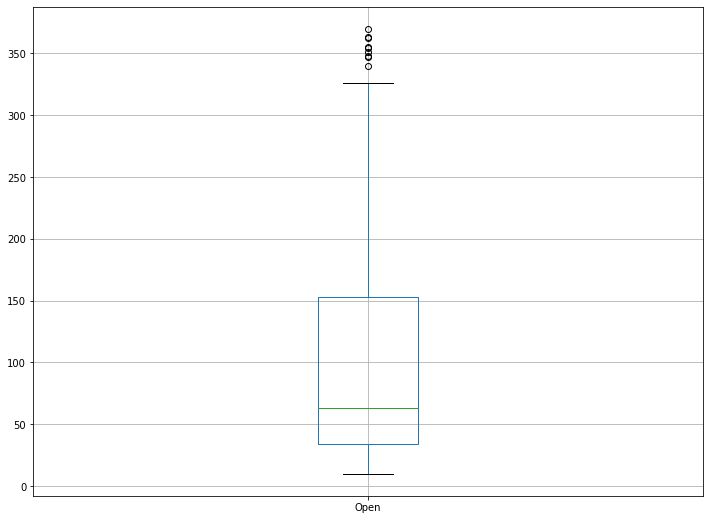

In [ ]:
# Checking for outliers in Open
dataset.boxplot('Open')

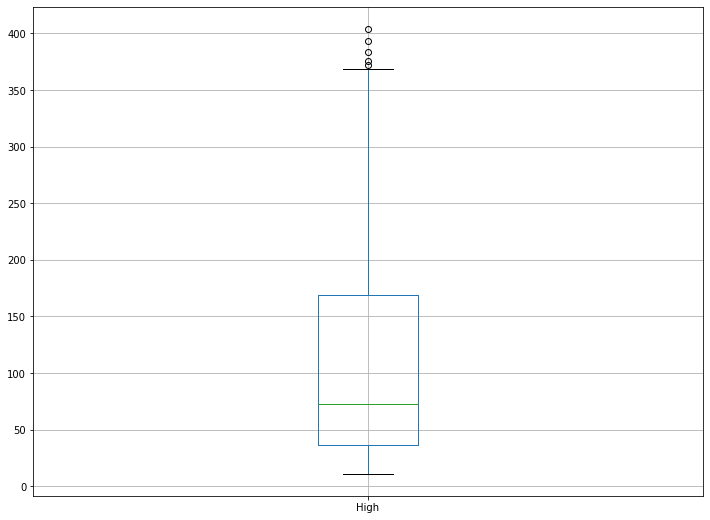

In [ ]:
# Checking for outliers in High
dataset.boxplot('High')

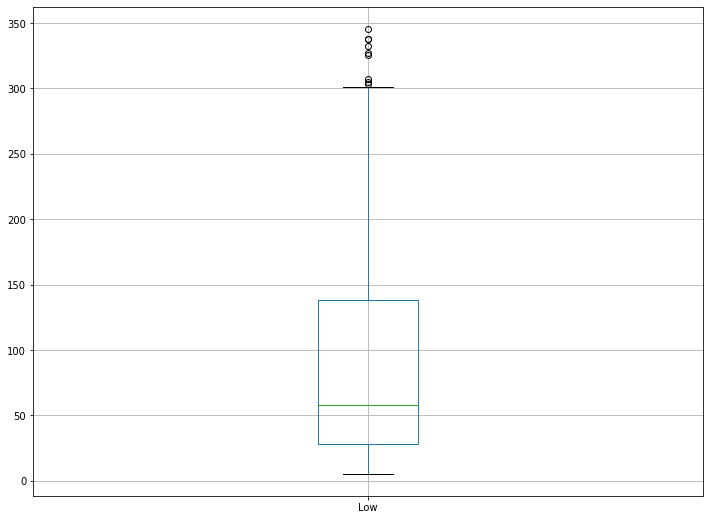

In [ ]:
# Checking for outliers in Low 
dataset.boxplot('Low')

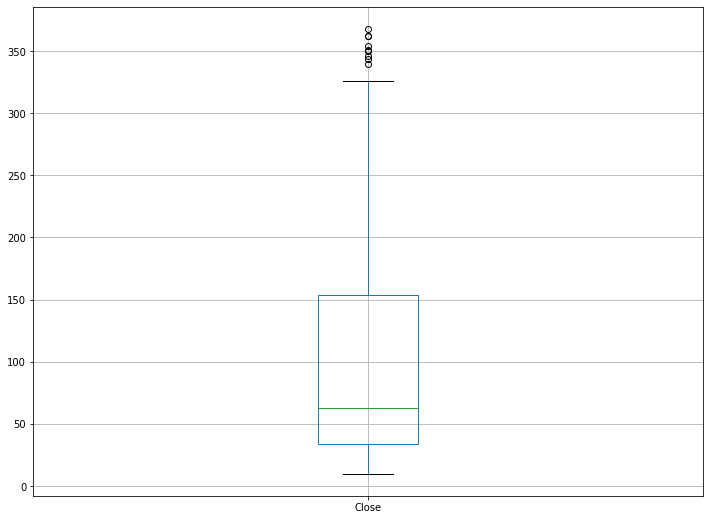

In [ ]:
# Checking for outliers in Close 
dataset.boxplot('Close')

**Conclusion**
* Dataset contain only unique values i.e dataset have 185 unique values
* No outliers are present in the dataset

### EDA

In [ ]:
# Copy the data to preserve orginal data
df = dataset.copy()

**Closing Price** 

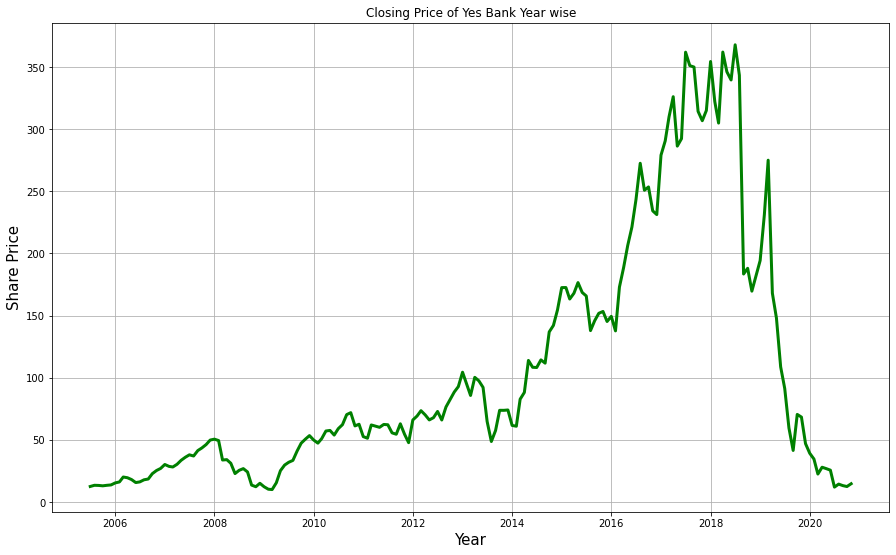

In [ ]:
# Plotting close price with repect to year
plt.figure(figsize=(15,9))
plt.xlabel("Year",fontsize=15)
plt.title("Closing Price of Yes Bank Year wise")
plt.ylabel("Share Price" , fontsize = 15)
plt.plot(df['Date'], df['Close'] , color = 'green' , linewidth= 3)
plt.grid()

* As seen in the above trend Yes Bank show a strong growth from 2009 to 2018.
* After 2018 Share price of yes bank fall due to Rana Kapoor froud case.

**Dependent Variable**

Text(0, 0.5, 'Density')

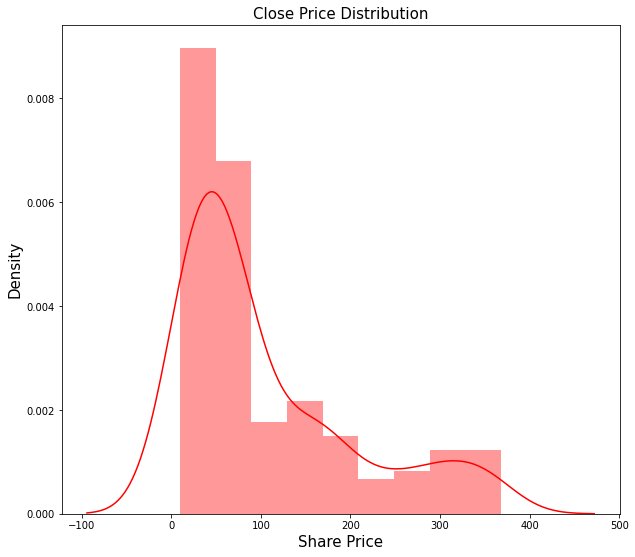

In [ ]:
# Dependent Variable
plt.figure(figsize=(10,9))
sns.distplot(df["Close"],color='red')
plt.title("Close Price Distribution",fontsize=15)
plt.xlabel('Share Price',fontsize=15)
plt.ylabel("Density",fontsize =15)

* Dependent Variable is CLose
* The above plot is Right Skewwed.
* To make it skew we apply following transformation:
  1. Log Transformation
  2. sqrt transformation
  3. reverse transformation



Text(0, 0.5, 'Density')

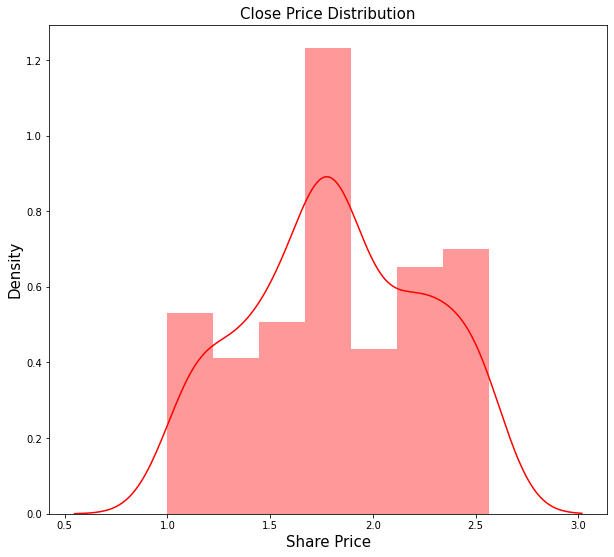

In [ ]:
# Dependent Variable - log transformation
plt.figure(figsize=(10,9))
sns.distplot(np.log10(df["Close"]),color='red')
plt.title("Close Price Distribution",fontsize=15)
plt.xlabel('Share Price',fontsize=15)
plt.ylabel("Density",fontsize =15)

Text(0, 0.5, 'Density')

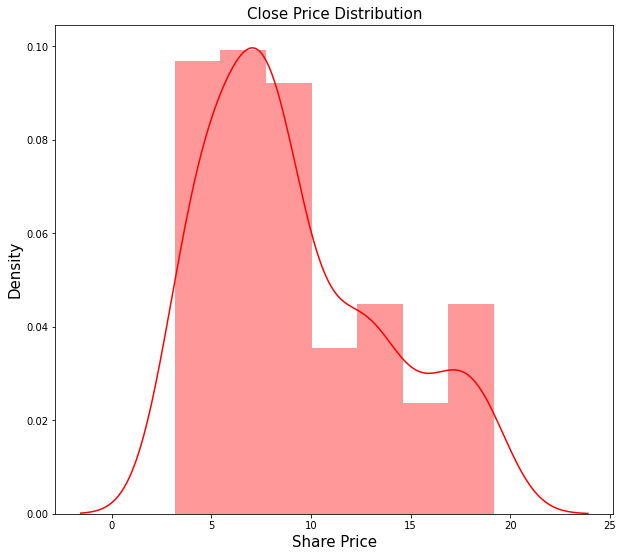

In [ ]:
# Dependent Variable - sqrt tranformation
plt.figure(figsize=(10,9))
sns.distplot(np.sqrt(df["Close"]),color='red')
plt.title("Close Price Distribution",fontsize=15)
plt.xlabel('Share Price',fontsize=15)
plt.ylabel("Density",fontsize =15)

Text(0, 0.5, 'Density')

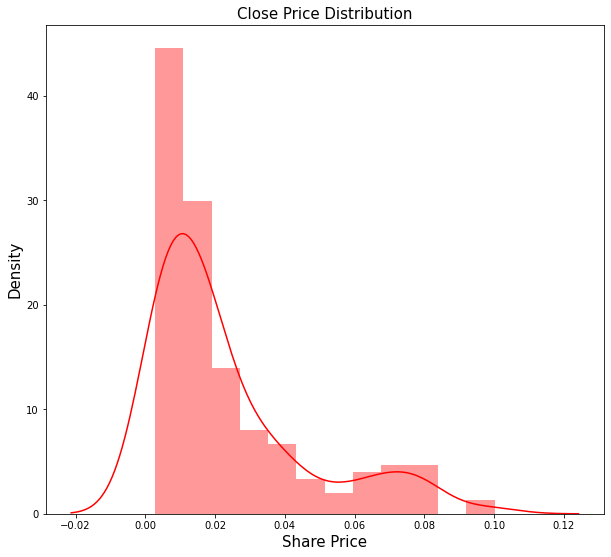

In [ ]:
# Dependent Variable - revrese transformation
plt.figure(figsize=(10,9))
sns.distplot((1/df["Close"]),color='red')
plt.title("Close Price Distribution",fontsize=15)
plt.xlabel('Share Price',fontsize=15)
plt.ylabel("Density",fontsize =15)

* So far log transformation has given best result
* reverse transformation perform worse

**Independent Variable**

Text(0, 0.5, 'Density')

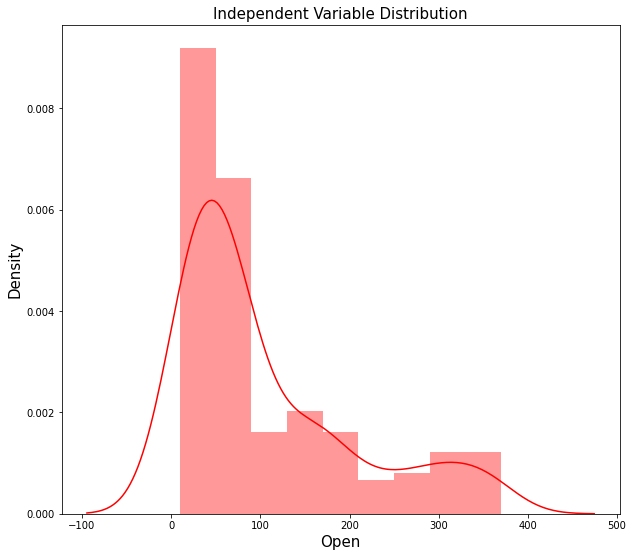

In [ ]:
# Independent Variable
plt.figure(figsize=(10,9))
sns.distplot(df["Open"],color='red')
plt.title("Independent Variable Distribution",fontsize=15)
plt.xlabel('Open',fontsize=15)
plt.ylabel("Density",fontsize =15)

Text(0, 0.5, 'Density')

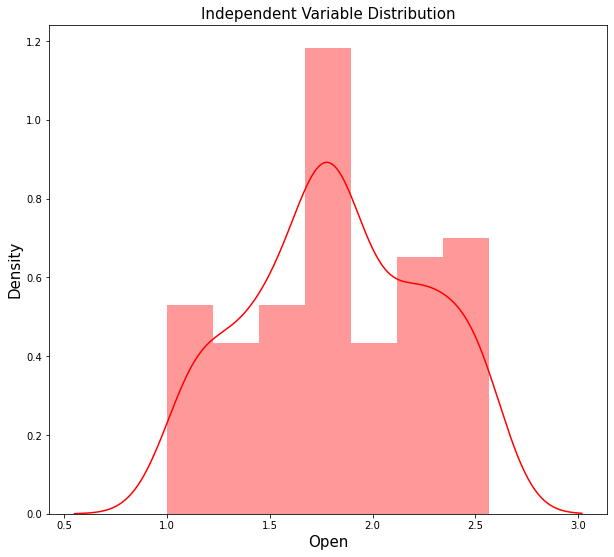

In [ ]:
# Independent Variable
plt.figure(figsize=(10,9))
sns.distplot(np.log10(df["Open"]),color='red')
plt.title("Independent Variable Distribution",fontsize=15)
plt.xlabel('Open',fontsize=15)
plt.ylabel("Density",fontsize =15)

Text(0, 0.5, 'Density')

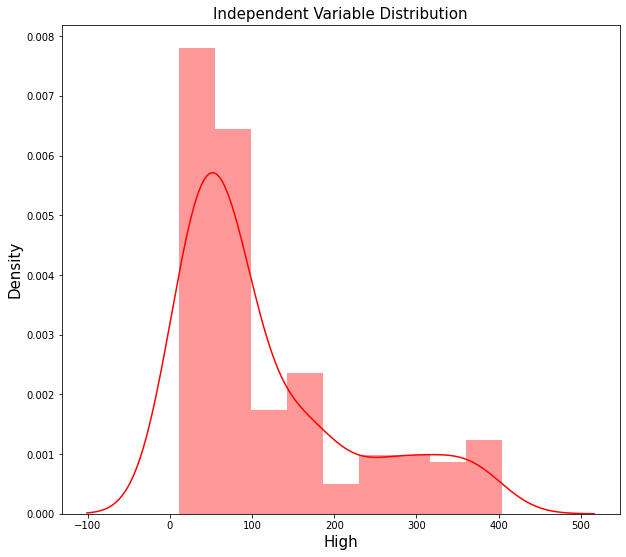

In [ ]:
# Independent Variable
plt.figure(figsize=(10,9))
sns.distplot(df["High"],color='red')
plt.title("Independent Variable Distribution",fontsize=15)
plt.xlabel('High',fontsize=15)
plt.ylabel("Density",fontsize =15)

Text(0, 0.5, 'Density')

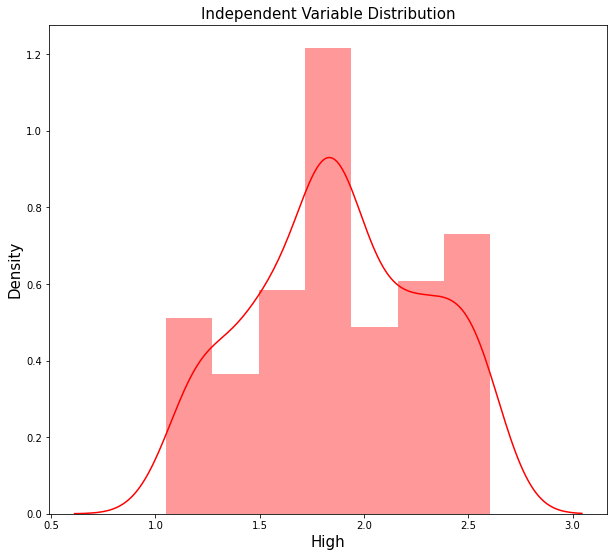

In [ ]:
# Independent Variable
plt.figure(figsize=(10,9))
sns.distplot(np.log10(df["High"]),color='red')
plt.title("Independent Variable Distribution",fontsize=15)
plt.xlabel('High',fontsize=15)
plt.ylabel("Density",fontsize =15)

Text(0, 0.5, 'Density')

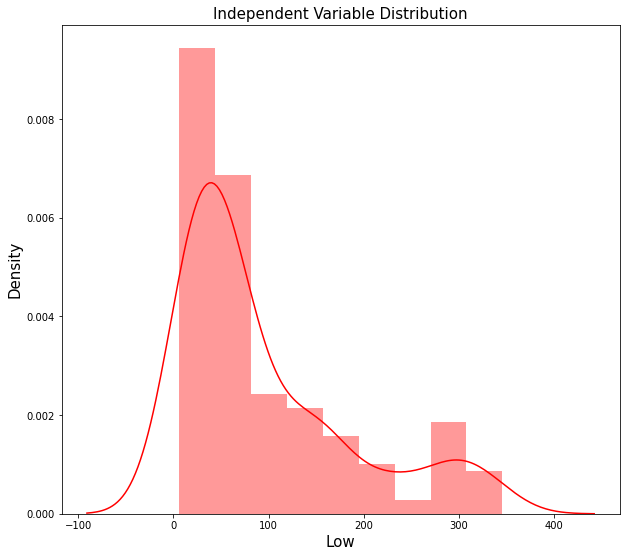

In [ ]:
# Independent Variable
plt.figure(figsize=(10,9))
sns.distplot(df["Low"],color='red')
plt.title("Independent Variable Distribution",fontsize=15)
plt.xlabel('Low',fontsize=15)
plt.ylabel("Density",fontsize =15)

Text(0, 0.5, 'Density')

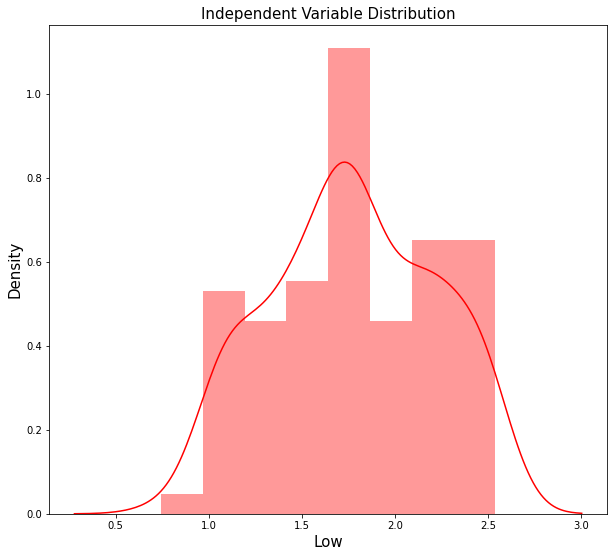

In [ ]:
# Independent Variable
plt.figure(figsize=(10,9))
sns.distplot(np.log10(df["Low"]),color='red')
plt.title("Independent Variable Distribution",fontsize=15)
plt.xlabel('Low',fontsize=15)
plt.ylabel("Density",fontsize =15)

**Realation between Dependent and Independent Variable**

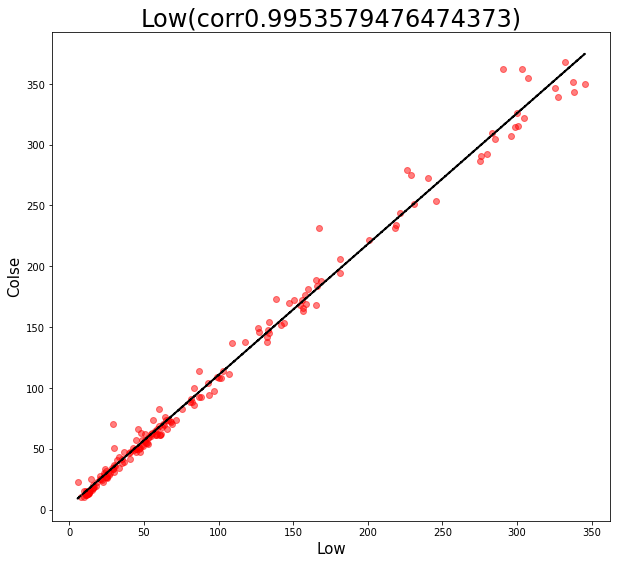

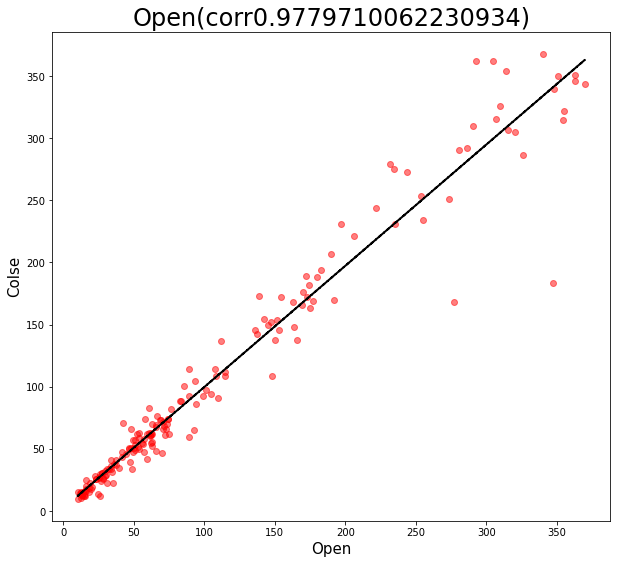

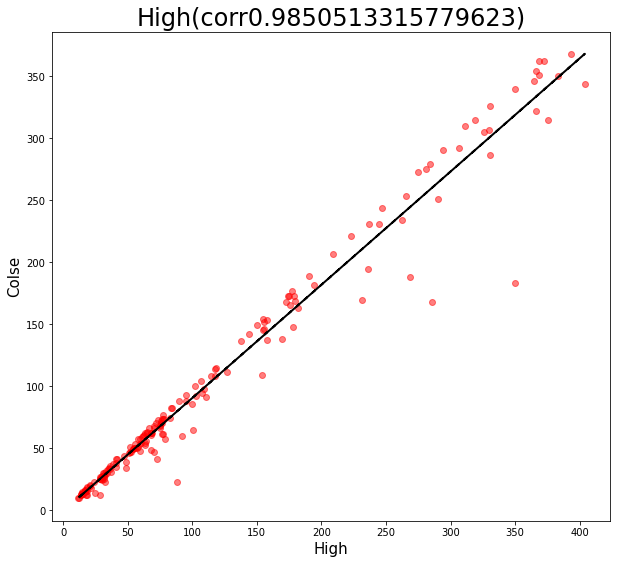

In [ ]:
# The realation between the Dependent Variable and independent Variable
X  = list(set(df.columns) - {"Date" , "Close"})
for col in X:
  fig = plt.figure(figsize = (10,9))
  ax = fig.gca()
  features = df[col]
  label = df['Close']
  correlation = features.corr(label)
  plt.scatter(x=features , y = label, color = 'red',alpha=0.5)
  plt.xlabel(col,fontsize=15)
  plt.ylabel('Colse',fontsize = 15)
  ax.set_title(col + '(corr' + str(correlation) + ')' ,fontsize = 24)
  z = np.polyfit(df[col] , df['Close'] , 1)
  y_hat = np.poly1d(z)(dataset[col])

  plt.plot(dataset[col] , y_hat , 'r--', lw = 2 ,color = 'black')

plt.show()

**Correlation Heatmap**

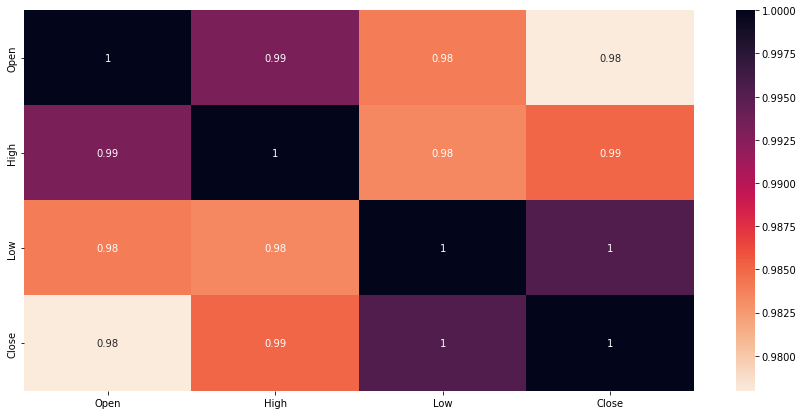

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),  annot=True, cmap="rocket_r")
plt.show()

In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# VIF score
calc_vif(df[X])

,variables,VIF
0,Low,71.574137
1,Open,175.185704
2,High,167.057523


* So all variable shown highest correlation 
* We will not perform feature engineering because each feature is important in real world  most indicators take into account each of these features to predict future values.
* We have to drop which is least correlated with dependent variable.

In [ ]:
# VIF score
calc_vif(df[[i for i in X if i not in ["Open"]]])

,variables,VIF
0,Low,62.598129
1,High,62.598129


Droping Open which is least correlated 

# Ml Model

### Train Test Split

In [ ]:
# Spliting data into dependent and independent variable
x = df[X]
y = df["Close"]

# Data transformation
from scipy.stats import zscore
x = x.apply(zscore)
y = np.log10(y)
     
# splitting the dadaset into the training set and test set with ratio 80-20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
# Shape of train and test
print("Shape of train is ", X_train.shape)
print("Shape of test is ", X_test.shape)

Shape of train is  (148, 3)
Shape of test is  (37, 3)


### Linear Regression

In [ ]:
# Fitting Multiple Linear Regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Training accuracy
regressor.score(X_train, y_train)

0.8146653424416905

In [ ]:
# Test accuracy
regressor.score(X_test,y_test)

0.8225699915389754

In [ ]:
# Coeffecient values.
regressor.coef_

array([ 0.23173905, -0.04654099,  0.19795929])

In [ ]:
# Intercept values.
regressor.intercept_

1.8292785179315048

In [ ]:
#prediction of test data
y_pred = regressor.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [ ]:
# Evaluation metrics.
MSE = mean_squared_error(10**(y_test), 10**(y_pred))
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(10**(y_test), 10**(y_pred))
MAPE = mean_absolute_percentage_error(10**(y_test), 10**(y_pred))
r2 = r2_score(10**(y_test), 10**(y_pred))
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("MAE: ", MAE)
print("MAPE:",MAPE)
print("r2: ",r2)

MSE:  3597.8813540947426
RMSE:  59.982342019087106
MAE:  33.14227103290172
MAPE: 0.38897987840057885
r2:  0.6114325236201956


In [ ]:
df["Close"].mean()

105.2047027027027

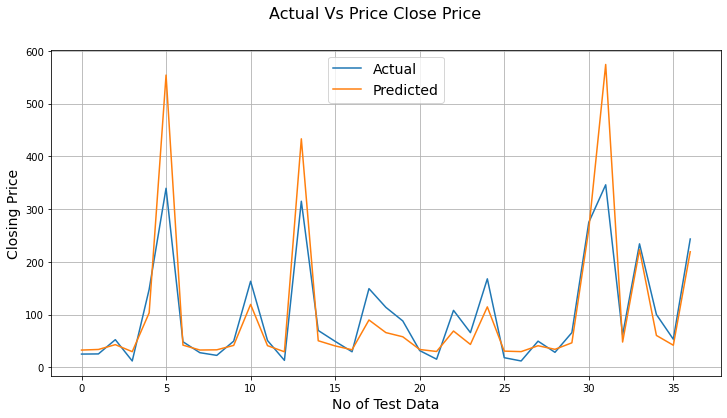

In [ ]:
# Actual Price vs predicted price for Linear Regression plot
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs Price Close Price', fontsize =16)
plt.legend(['Actual', 'Predicted'], fontsize = 14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid()


* As we can see Linear Regression is performing worse.
* We are getting mean(mean of Close) is 105 whereas our MSE is 33 times higher than our mean
* r2 is 0.6114 which is not good 
* try to use Lasso for better result

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.000001, max_iter = 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=1e-06, max_iter=3000)

In [ ]:
# Lasso Score
lasso.score(X_train, y_train)

0.8146653407577474

In [ ]:
# prediction of train data
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso

array([1.51738463, 1.53211842, 1.63520043, 1.47539455, 2.01472061,
       2.74369467, 1.62603075, 1.51851203, 1.52352695, 1.62092945,
       2.07717146, 1.61560121, 1.47291044, 2.63686266, 1.70385424,
       1.61032922, 1.52501188, 1.95400242, 1.81965095, 1.76422717,
       1.5316246 , 1.48038582, 1.83884117, 1.63945316, 2.05987137,
       1.49003526, 1.47675728, 1.61402095, 1.53536227, 1.66895713,
       2.41767956, 2.7591843 , 1.68262802, 2.34871361, 1.78259079,
       1.62415119, 2.34099607])

In [ ]:
# Evaluation metrics.
MSE = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
RMSE = np.sqrt(MSE)
r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
MAE = mean_absolute_error(10**(y_test), 10**(y_pred_lasso))
MAPE = mean_absolute_percentage_error(10**(y_test), 10**(y_pred_lasso))
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("MAE: ", MAE)
print("MAPE:",MAPE)
print("r2: ",r2)

MSE:  3598.964061610982
RMSE:  59.99136655895565
MAE:  33.145067579609375
MAPE: 0.38898833635021185
r2:  0.6113155923248477


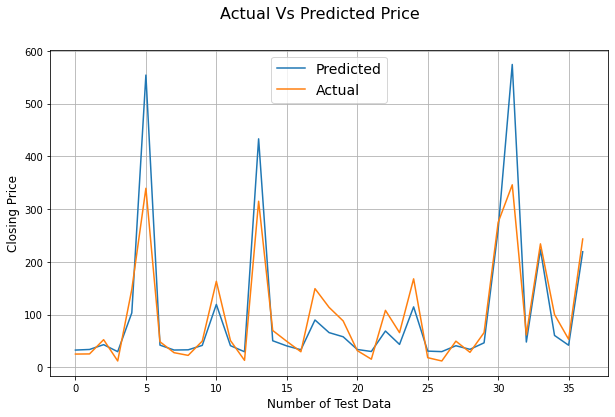

In [ ]:
# Price vs predicted price for Lasso 
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price', fontsize= 16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid()
     

* I use Lasso Regression and performing worse than Linear Regression.
* The MSE-3598.96 ,RSME-59.91 which is higher compared to Linear regression.
* r2- 0.6113 which is higher.
* Trying to use hyperprameter to get better result.

### Lasso Regression - Cross Validation

In [ ]:
# Hyper parameter of Tuning For Lasso Regression
lasso =Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print(" The best Fit alpha value is found out to be :", round(lasso_regressor.best_params_['alpha'], 4))
print(" The negative mean squared error is : ", round(lasso_regressor. best_score_,4))

 The best Fit alpha value is found out to be : 0.01
 The negative mean squared error is :  -0.0352


In [ ]:
# Prediction of test data .
y_pred_lassoCV = lasso_regressor.predict(X_test)
y_pred_lassoCV

array([1.52469315, 1.53969497, 1.643315  , 1.48475601, 2.01243495,
       2.72852127, 1.63521157, 1.52508103, 1.53320378, 1.62736178,
       2.07428164, 1.62113302, 1.48269862, 2.61890564, 1.70862173,
       1.61717847, 1.53238411, 1.95457029, 1.81308984, 1.76452915,
       1.53981954, 1.49071928, 1.84005298, 1.64004479, 2.05510432,
       1.4994446 , 1.48610941, 1.61863597, 1.54361484, 1.6761846 ,
       2.39308327, 2.74613969, 1.68943602, 2.34231138, 1.78097518,
       1.62962145, 2.3242408 ])

In [ ]:
# Evaluation metrics.
MSE = mean_squared_error(10**(y_test), 10**(y_pred_lassoCV))
RMSE = np.sqrt(MSE)
r2 = r2_score(10**(y_test), 10**(y_pred_lassoCV))
MAE = mean_absolute_error(10**(y_test), 10**(y_pred_lassoCV))
MAPE = mean_absolute_percentage_error(10**(y_test), 10**(y_pred_lassoCV))
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("MAE: ", MAE)
print("MAPE:",MAPE)
print("r2: ",r2)

MSE:  3122.7613710981764
RMSE:  55.881672944697854
MAE:  32.51994598673169
MAPE: 0.3954932272715698
r2:  0.6627449918761263


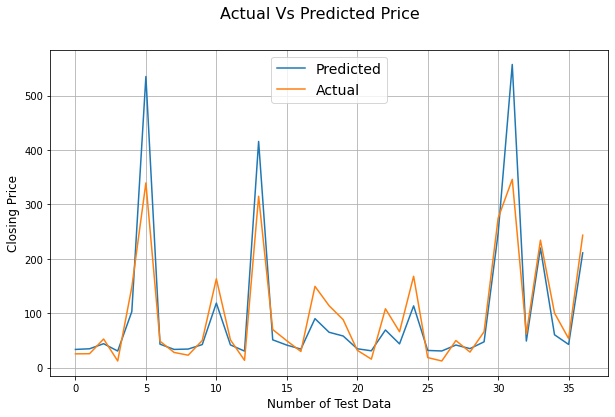

In [ ]:
# Price vs predicted price for Lasso 
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_lassoCV))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price', fontsize= 16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid()

* After using Hyperprameter in Lasso regression we get better result.
* Our MSE-3124 and RSME-55 which imporve and same goes to r2- 0.6625
* Trying to use Ridge see whether our result imporve or not.

### Ridge Regression

In [ ]:
# Fitting the data into ridge regression
ridge = Ridge (alpha= 0.01)
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [ ]:
# Accuracy of Ridge regression model
ridge.score(X_train, y_train)

0.8146652266824459

In [ ]:
# prediction of test data
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([1.51737287, 1.53212183, 1.63527718, 1.47540733, 2.01476992,
       2.74386608, 1.62612711, 1.518483  , 1.52357555, 1.62095755,
       2.07724424, 1.61560489, 1.47293231, 2.63690439, 1.70389154,
       1.61036116, 1.52500609, 1.95408562, 1.81948322, 1.76419247,
       1.53164246, 1.48042498, 1.83887238, 1.63935141, 2.05988924,
       1.49005809, 1.47677062, 1.61400144, 1.53538386, 1.66903264,
       2.41743053, 2.75941508, 1.68270132, 2.34886131, 1.78252064,
       1.62415831, 2.34089158])

In [ ]:
# Evaluation metrics.
MSE = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
RMSE = np.sqrt(MSE)
r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
MAE = mean_absolute_error(10**(y_test), 10**(y_pred_ridge))
MAPE = mean_absolute_percentage_error(10**(y_test), 10**(y_pred_ridge))
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("MAE: ", MAE)
print("MAPE:",MAPE)
print("r2: ",r2)

MSE:  3605.6025601883703
RMSE:  60.04666985094486
MAE:  33.16270859801887
MAPE: 0.38904646169074586
r2:  0.6105986413236061


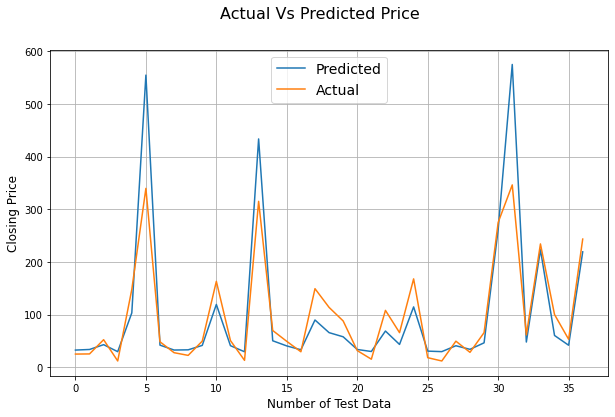

In [ ]:
# Price vs predicted price for Lasso 
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price', fontsize= 16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid()

* So we have seen a same trend in Ridge Regression which we have seen in lasso regression(without Cross Validation) Where it perform Worse than Linear Regression. As our RSME, MSE, r2 decrease.

### Ridge Regression - Cross Validation

In [ ]:
# Hyperparameter of tunning
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)

In [ ]:
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(" The Best Fit Alpha Value is found out to be :", ridge_regressor.best_params_['alpha'])
print(" The negative mean squared error for is :", round(ridge_regressor.best_score_, 3))

 The Best Fit Alpha Value is found out to be : 10
 The negative mean squared error for is : -0.035


In [ ]:
# Model Prediction
y_pred_ridge1 = ridge_regressor.predict(X_test)
y_pred_ridge1

array([1.52133054, 1.53728128, 1.64940763, 1.4839079 , 2.02368702,
       2.73378721, 1.64726711, 1.5213362 , 1.53624874, 1.6280259 ,
       2.07922307, 1.61714065, 1.48054103, 2.61189076, 1.70753952,
       1.61769429, 1.52987123, 1.96119864, 1.80123808, 1.75900482,
       1.53947926, 1.49160849, 1.83960113, 1.63228305, 2.05254637,
       1.49759728, 1.48541775, 1.61420655, 1.54258389, 1.68083452,
       2.37546978, 2.76285145, 1.69521298, 2.35812164, 1.77364892,
       1.62674463, 2.3102558 ])

In [ ]:
# Evaluation metrics.
MSE = mean_squared_error(10**(y_test), 10**(y_pred_ridge1))
RMSE = np.sqrt(MSE)
r2 = r2_score(10**(y_test), 10**(y_pred_ridge1))
MAE = mean_absolute_error(10**(y_test), 10**(y_pred_ridge1))
MAPE = mean_absolute_percentage_error(10**(y_test), 10**(y_pred_ridge1))
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("MAE: ", MAE)
print("MAPE:",MAPE)
print("r2: ",r2)

MSE:  3441.9521437010117
RMSE:  58.66815272105482
MAE:  33.23927833578728
MAPE: 0.395990060032686
r2:  0.6282727175603409


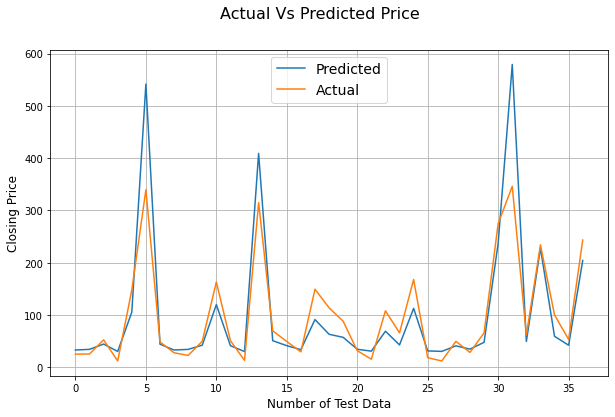

In [ ]:
# Price vs predicted price for Lasso 
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_ridge1))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price', fontsize= 16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid()

* So our Ridge Regression Improve but it doesn't imporve that much as Lasso Regression (with Cross Validation) improve.

### Elastic Net

In [ ]:
#fitting data into Elastic Net
elastic = ElasticNet(alpha=0.1,l1_ratio=0.05)
elastic_model = elastic.fit(X_train,y_train)

In [ ]:
elastic.score(X_train,y_train)

0.8107379535128418

In [ ]:
y_pred_elastic = elastic.predict(X_test)
y_pred_elastic

array([1.52800374, 1.54362898, 1.65385828, 1.49157479, 2.0205579 ,
       2.71351563, 1.65235358, 1.52805697, 1.5430126 , 1.63258098,
       2.07400021, 1.62152707, 1.48808216, 2.59359551, 1.71007387,
       1.62244147, 1.5364213 , 1.95874155, 1.80153051, 1.76026231,
       1.54594189, 1.49916524, 1.83930361, 1.63645708, 2.04733846,
       1.50478998, 1.49306622, 1.61873115, 1.54887731, 1.68442509,
       2.36275304, 2.7429465 , 1.69862648, 2.34755804, 1.77456037,
       1.63102868, 2.29864035])

In [ ]:
# Evaluation metrics.
MSE = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
RMSE = np.sqrt(MSE)
r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
MAE = mean_absolute_error(10**(y_test), 10**(y_pred_elastic))
MAPE = mean_absolute_percentage_error(10**(y_test), 10**(y_pred_elastic))
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("MAE: ", MAE)
print("MAPE:",MAPE)
print("r2: ",r2)

MSE:  2843.018425159099
RMSE:  53.31996272653516
MAE:  32.03947384941992
MAPE: 0.39953693102601334
r2:  0.6929569415878335


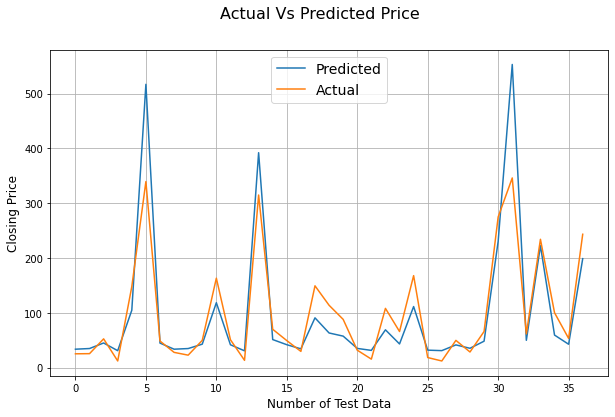

In [ ]:
# Price vs predicted price for Lasso 
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price', fontsize= 16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid()

* So Elastic Net give far better result compare to linear , lasso, ridge    regression.
* MSE-2843.80 ,RMSE-53.32 both MSE and RSME is improved also r2-0.6928
which is better compare to other regression model.
* Try to use cross validation to see whether result improve or not.


### Elastic Net - Cross Validation

In [ ]:
# Hyper-Parameter Tuning for Elastic Net
elastic = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model= GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=3)

In [ ]:
elastic_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model.best_params_['alpha'], elastic_model.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.01 1
The negative mean squared error for is:  -0.035


In [ ]:
y_pred_elastic1 = elastic_model.predict(X_test)
y_pred_elastic1

array([1.52469315, 1.53969497, 1.643315  , 1.48475601, 2.01243495,
       2.72852127, 1.63521157, 1.52508103, 1.53320378, 1.62736178,
       2.07428164, 1.62113302, 1.48269862, 2.61890564, 1.70862173,
       1.61717847, 1.53238411, 1.95457029, 1.81308984, 1.76452915,
       1.53981954, 1.49071928, 1.84005298, 1.64004479, 2.05510432,
       1.4994446 , 1.48610941, 1.61863597, 1.54361484, 1.6761846 ,
       2.39308327, 2.74613969, 1.68943602, 2.34231138, 1.78097518,
       1.62962145, 2.3242408 ])

In [ ]:
# Evaluation metrics.
MSE = mean_squared_error(10**(y_test), 10**(y_pred_elastic1))
RMSE = np.sqrt(MSE)
r2 = r2_score(10**(y_test), 10**(y_pred_elastic1))
MAE = mean_absolute_error(10**(y_test), 10**(y_pred_elastic1))
MAPE = mean_absolute_percentage_error(10**(y_test), 10**(y_pred_elastic1))
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("MAE: ", MAE)
print("MAPE:",MAPE)
print("r2: ",r2)

MSE:  3122.7613710981764
RMSE:  55.881672944697854
MAE:  32.51994598673169
MAPE: 0.3954932272715698
r2:  0.6627449918761263


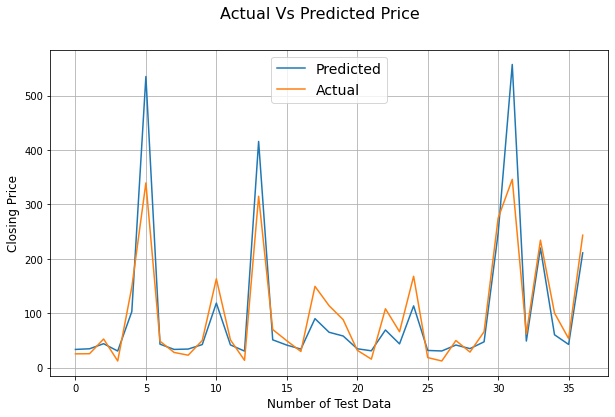

In [ ]:
# Price vs predicted price for Lasso 
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_elastic1))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price', fontsize= 16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid()

In Elastic Cross validation our MSE and RMSE actual increase instead of decrrease.

### XGBoost Regressor

In [ ]:
# fitting the data into XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train,y_train)

[07:06:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xgb.score(X_train,y_train)

0.9989856158912769

In [ ]:
y_pred_XG = xgb.predict(X_test)
y_pred_XG

array([1.3240345, 1.4468699, 1.7491498, 1.1570746, 2.1957493, 2.5145776,
       1.6748834, 1.402919 , 1.4468699, 1.7121533, 2.2341352, 1.7019634,
       1.097817 , 2.5032344, 1.8511137, 1.6865689, 1.443876 , 2.142931 ,
       1.9752042, 1.9523453, 1.4468699, 1.1984308, 2.025753 , 1.7286012,
       2.2308073, 1.2921474, 1.1570746, 1.7182921, 1.4809968, 1.7896991,
       2.4235322, 2.5344093, 1.8577319, 2.3706326, 1.9546288, 1.7555296,
       2.3739333], dtype=float32)

In [ ]:
# Evaluation metrics.
MSE = mean_squared_error(10**(y_test), 10**(y_pred_XG))
RMSE = np.sqrt(MSE)
r2 = r2_score(10**(y_test), 10**(y_pred_XG))
MAE = mean_absolute_error(10**(y_test), 10**(y_pred_XG))
MAPE = mean_absolute_percentage_error(10**(y_test), 10**(y_pred_XG))
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("MAE: ", MAE)
print("MAPE:",MAPE)
print("r2: ",r2)

MSE:  40.31756595168486
RMSE:  6.349611480373021
MAE:  4.615430534981391
MAPE: 0.07154040051415789
r2:  0.9956457444496348


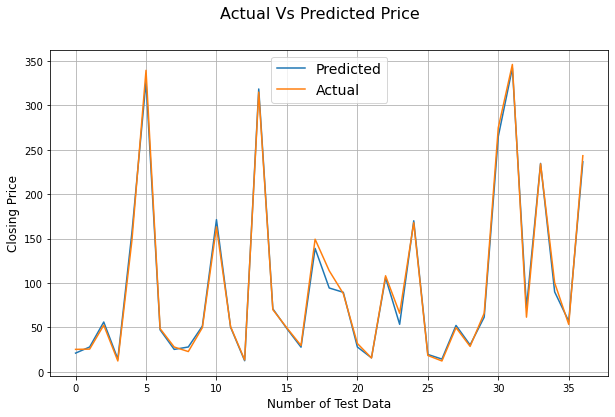

In [ ]:
# Price vs predicted price for Lasso 
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_XG))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price', fontsize= 16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid()

Xgboost give us far better result than any other Ml model.

Our MSE stand at 40 and RMSE is 6.34

# Conclusion